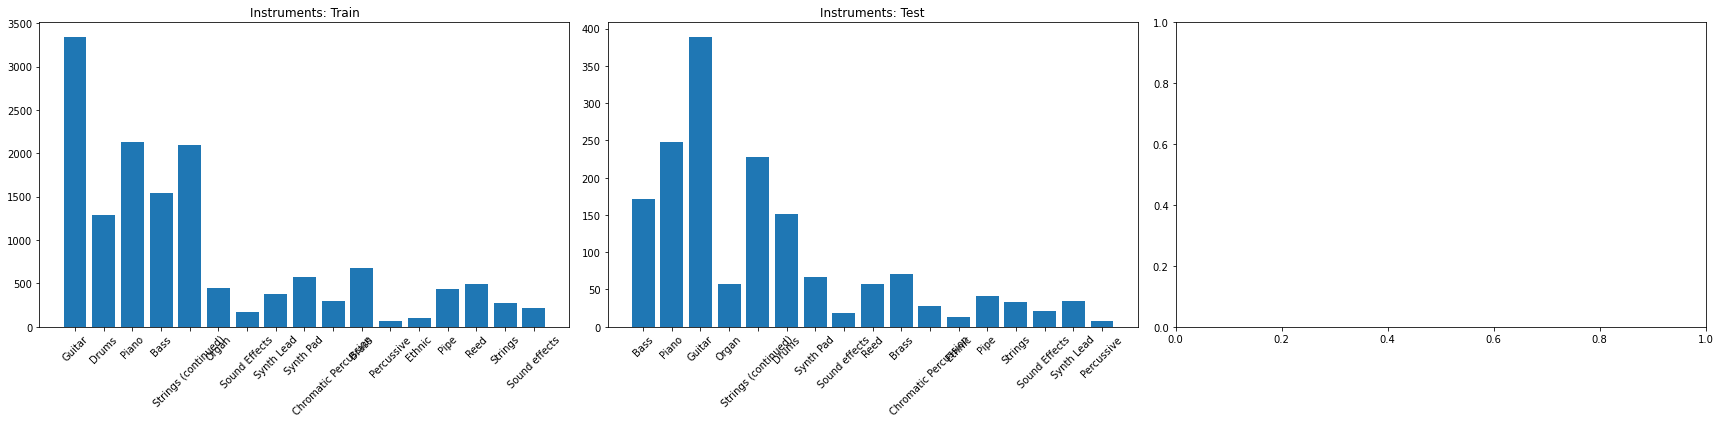

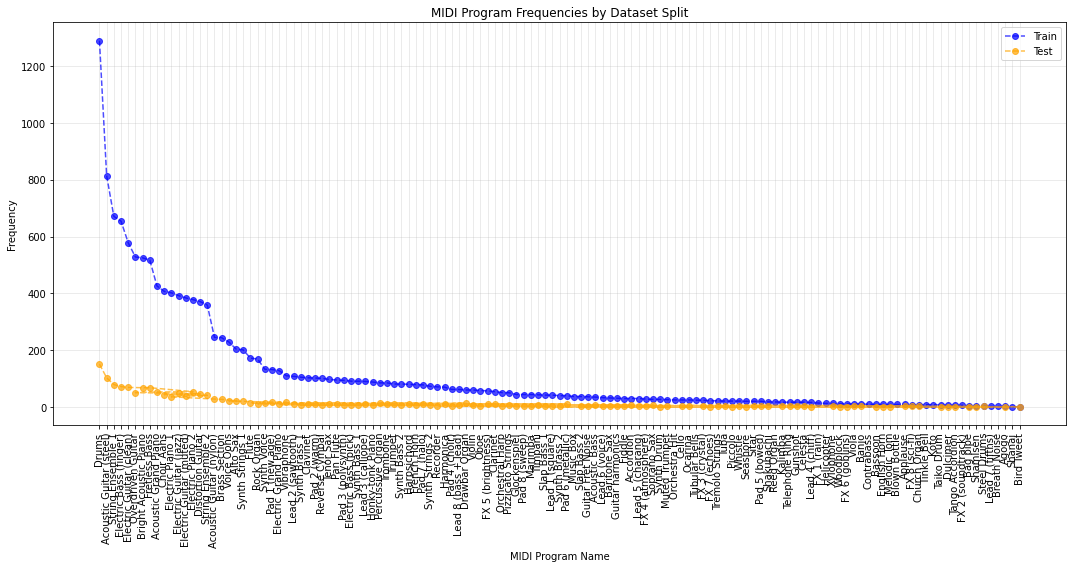

In [2]:
import os
import yaml
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# Update base directory path if needed
base_dir = 'slakh2100_flac_redux'
splits = ['train', 'test', 'validation']

# Create nested dictionary to store counts
count_data = {
    'instruments': defaultdict(Counter),
    'midi_programs': defaultdict(Counter)
}

def process_metadata(metadata_path):
    with open(metadata_path, 'r') as f:
        metadata = yaml.safe_load(f)
    
    instruments = []
    midi_programs = []
    
    for stem in metadata.get('stems', {}).values():
        if stem.get('inst_class'):
            instruments.append(stem['inst_class'])
        if stem.get('midi_program_name'):
            midi_programs.append(stem['midi_program_name'])
    
    return instruments, midi_programs

for split in splits:
    split_path = os.path.join(base_dir, split)
    
    if not os.path.exists(split_path):
        print(f"Warning: {split_path} not found, skipping")
        continue
    
    for track_dir in os.listdir(split_path):
        metadata_path = os.path.join(split_path, track_dir, 'metadata.yaml')
        
        if os.path.exists(metadata_path):
            instruments, midi_programs = process_metadata(metadata_path)
            count_data['instruments'][split].update(instruments)
            count_data['midi_programs'][split].update(midi_programs)

# Plotting functions
def plot_instrument_frequencies():
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))
    
    for i, split in enumerate(splits):
        counts = count_data['instruments'][split]
        if counts:
            axs[i].bar(counts.keys(), counts.values())
            axs[i].set_title(f'Instruments: {split.capitalize()}')
            axs[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_midi_program_frequencies():
    plt.figure(figsize=(15, 8))
    
    colors = {'train': 'blue', 'test': 'orange', 'valid': 'green'}
    
    for split in splits:
        counts = count_data['midi_programs'][split]
        if counts:
            programs, frequencies = zip(*sorted(counts.items(), key=lambda x: -x[1]))
            plt.plot(programs, frequencies, 
                    color=colors.get(split, 'gray'), 
                    marker='o',
                    linestyle='--',
                    alpha=0.7,
                    label=split.capitalize())
    
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel('MIDI Program Name')
    plt.legend()
    plt.title('MIDI Program Frequencies by Dataset Split')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_instrument_frequencies()
plot_midi_program_frequencies()
